In [1]:
## load the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
train = pd.read_csv("train.csv")
train.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


Dataframe description

In [3]:
rows, columns = train.shape
rows, columns

(106800, 15)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [5]:
train.describe()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,4.294958e+09,742.000000,3372.000000,2.147388e+09,1021.000000,17632.000000,4.294934e+09,65494.000000,19.000000,18.000000,16.000000,15.000000,15.000000,25.000000


In [6]:
# categorical columns
# find the categorical columns using the datatype
categorical_columns = train.select_dtypes(include=['object', 'category']).columns
train[categorical_columns].describe()

,expert_consensus
count,106800
unique,6
top,Seizure
freq,20933


Unique EEG, Spectrogram, label, and patient IDs

In [7]:
print("Number of EEG IDs: ", train.eeg_id.nunique())
print("Number of Spectrogram IDs: ", train.spectrogram_id.nunique())
print("Number of Label IDs: ", train.label_id.nunique())
print("Number of Patient IDs: ", train.patient_id.nunique())

Number of EEG IDs:  17089
Number of Spectrogram IDs:  11138
Number of Label IDs:  106800
Number of Patient IDs:  1950


Expert Consensus

In [8]:
# What are the possible conditions
list(train.expert_consensus.unique())

['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD']

<Axes: xlabel='expert_consensus'>

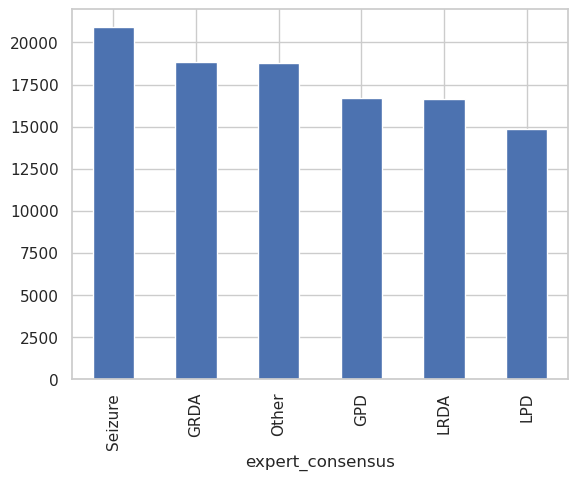

In [9]:
# how many instances of different conditions
train.expert_consensus.value_counts().plot(kind = 'bar')

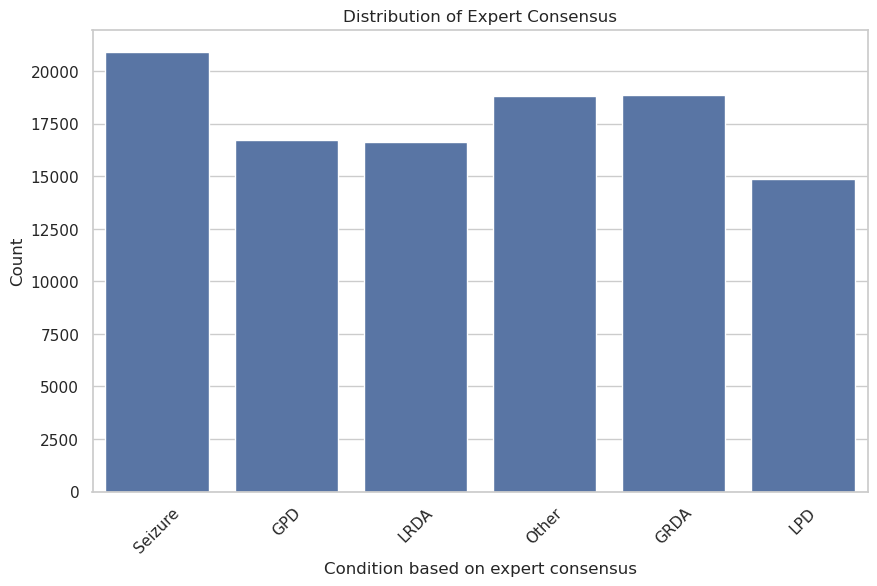

In [10]:
# matplotlib way to plot
plt.figure(figsize=(10,6))  # set the figure size
sns.countplot(data=train, x = "expert_consensus")
plt.title("Distribution of Expert Consensus")
plt.ylabel("Count")
plt.xlabel("Condition based on expert consensus")
plt.xticks(rotation=45)
plt.show()

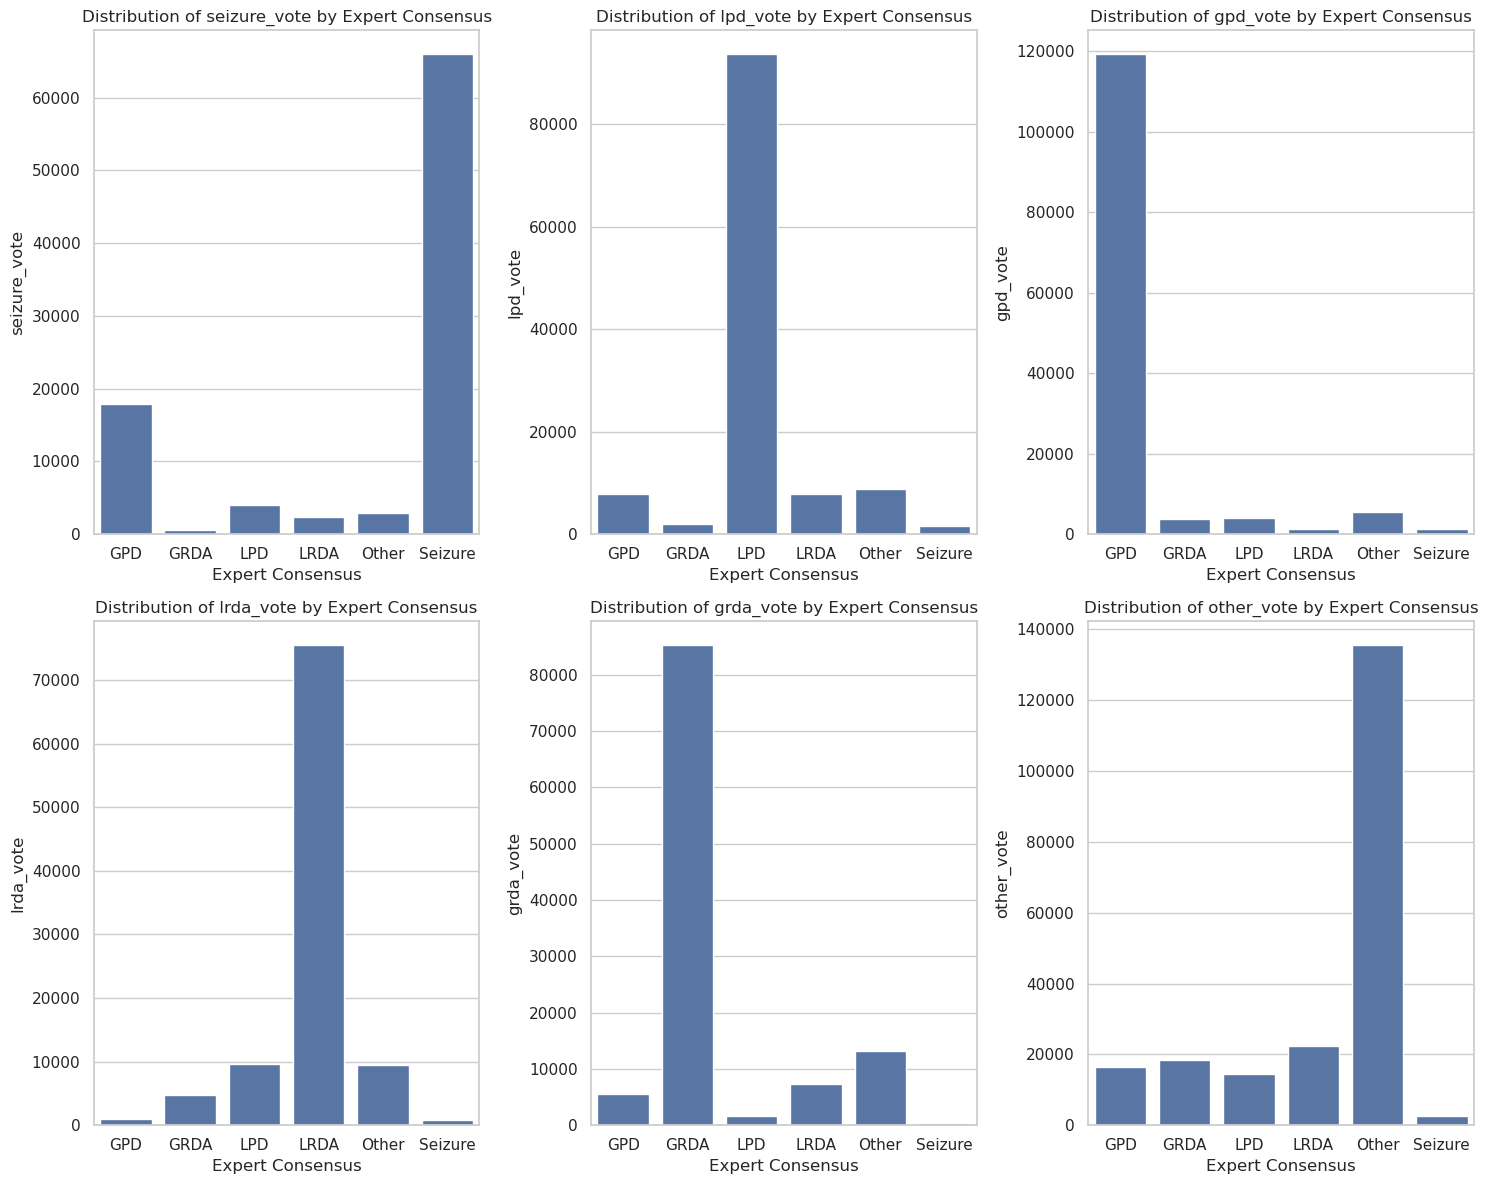

In [11]:
# What is the spread of votes in each of the conditions
vote_cats = ["seizure_vote", "lpd_vote", "gpd_vote", "lrda_vote", "grda_vote", "other_vote"]

plt.figure(figsize=(15,12))
for i, cat in enumerate(vote_cats,1):
    plt.subplot(2,3,i)
    sns.barplot(train[["expert_consensus",cat]].groupby("expert_consensus").agg('sum'), x = "expert_consensus", y = cat)
    plt.xlabel("Expert Consensus")
    plt.title(f'Distribution of {cat} by Expert Consensus')


plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

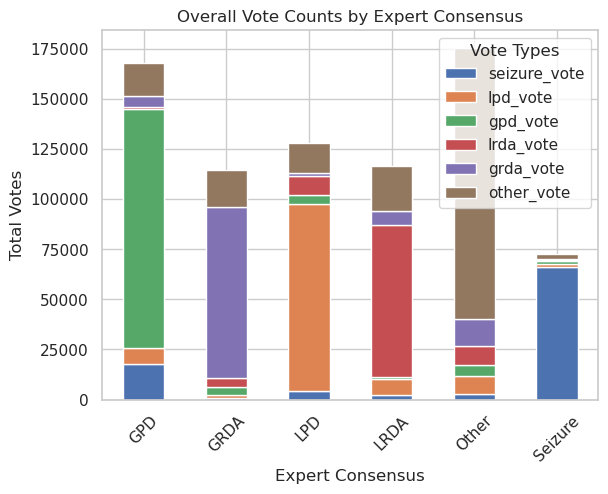

In [12]:
# Another way to plot
plt.figure(figsize=(12, 8))
train.groupby('expert_consensus')[vote_cats].sum().plot(kind='bar', stacked=True)
plt.title('Overall Vote Counts by Expert Consensus')
plt.xlabel('Expert Consensus')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.legend(title='Vote Types')
plt.show()

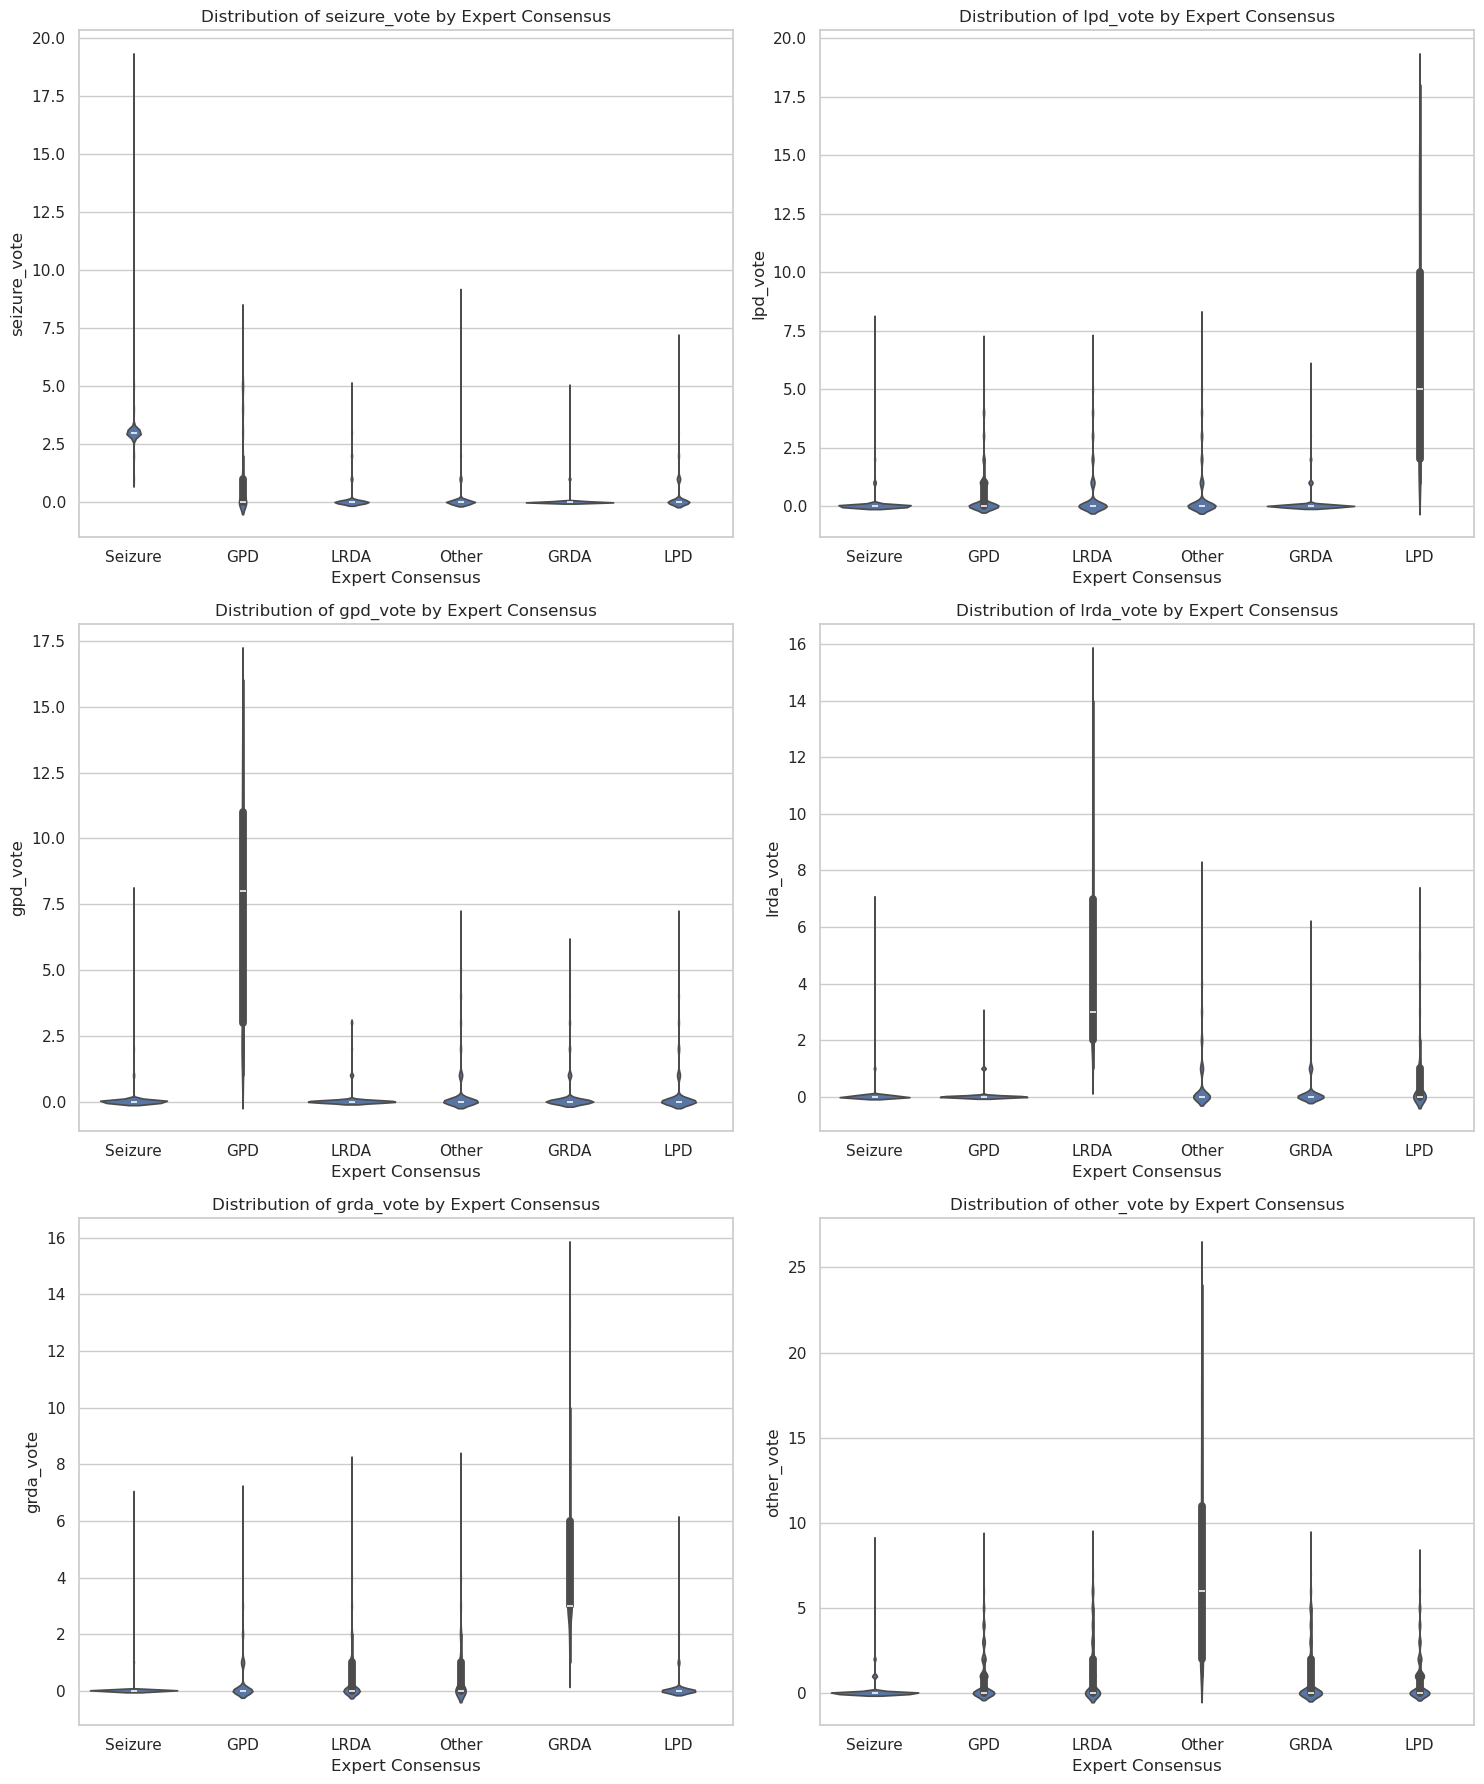

In [13]:
# range of <>_votes for each of the conditions
vote_cats = ["seizure_vote", "lpd_vote", "gpd_vote", "lrda_vote", "grda_vote", "other_vote"]

plt.figure(figsize=(15,18))
for i, cat in enumerate(vote_cats,1):
    plt.subplot(3,2,i)
    sns.violinplot(train, x = "expert_consensus", y = cat)
    plt.xlabel("Expert Consensus")
    plt.title(f'Distribution of {cat} by Expert Consensus')


plt.tight_layout()
plt.show()

Seems like in seizure cases, its generally less number of experts involved in consensus (median = 3) as compared to other conditions

What is the spread of total number of experts in each instance?

In [39]:
train.expert_consensus.value_counts()

expert_consensus
Seizure    20933
GRDA       18861
Other      18808
GPD        16702
LRDA       16640
LPD        14856
Name: count, dtype: int64

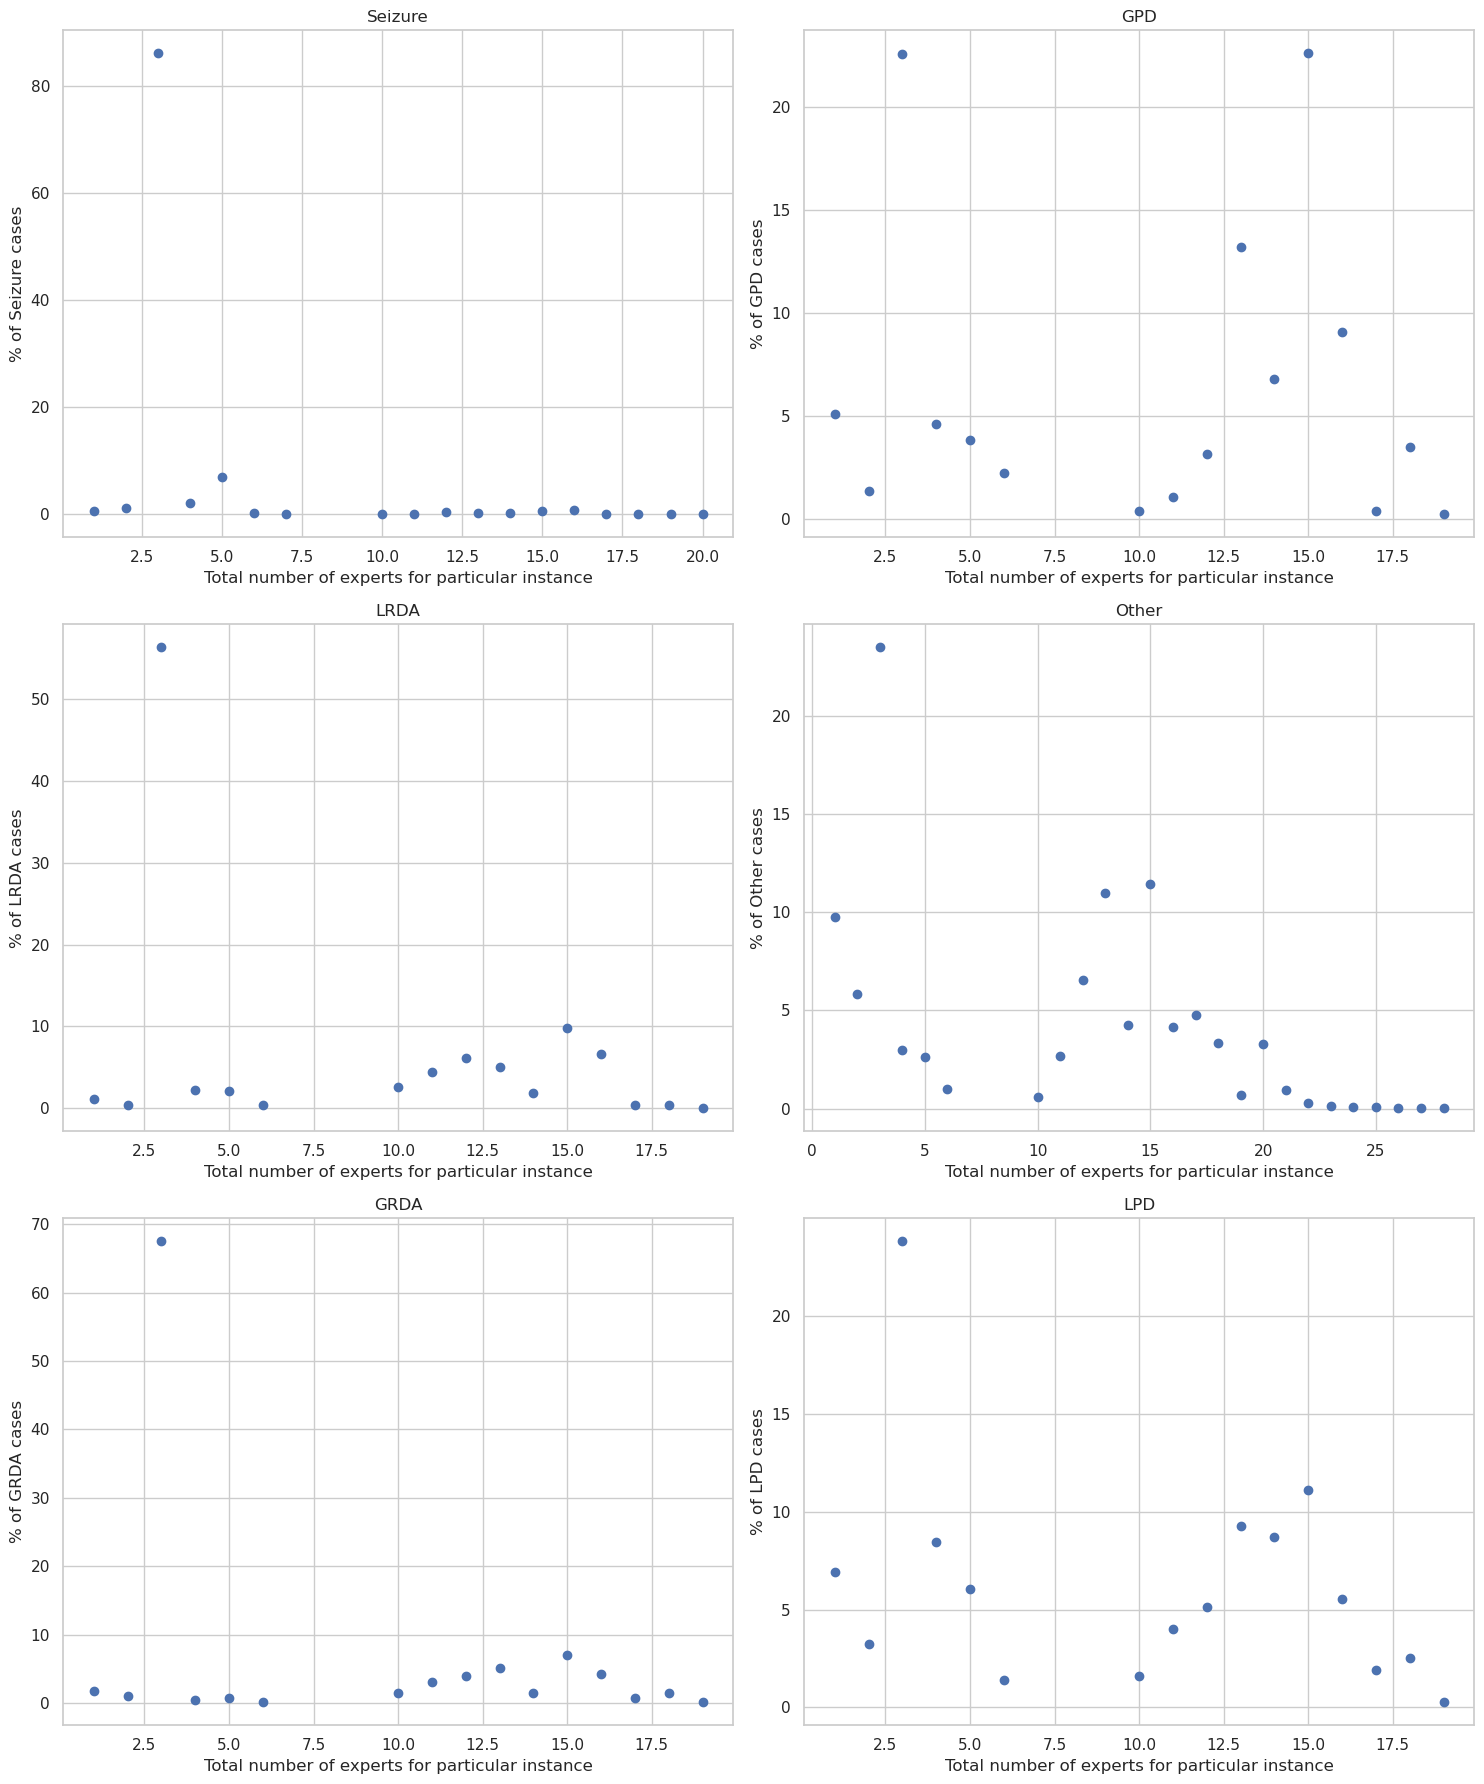

In [41]:
plt.figure(figsize=(15,18))
for i, cat in enumerate(list(train.expert_consensus.unique()),1):
    plt.subplot(3,2,i)
    df = (train.loc[train.expert_consensus == cat][vote_cats].sum(axis=1).value_counts()*100/train.expert_consensus.value_counts()[cat]).to_frame()
    plt.scatter(df.index, df['count'])
    plt.xlabel("Total number of experts for particular instance")
    plt.ylabel('% of ' + cat + ' cases')
    plt.title(cat)

plt.tight_layout()
plt.show()